In [9]:
from megs import model
from megs.data import image_modules

import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = model.DataLoader("/export/home/ucakir/MEGS/MEGS/data/galaxy_data.hdf5", m_min = 8)

File: /export/home/ucakir/MEGS/MEGS/data/galaxy_data.hdf5
Group: Galaxies
    Group: Attributes
        Dataset: halo_id (float32) ((12484,))
        Dataset: mass (float32) ((12484,))
    Group: Particles
        Group: stars
            Group: Images
                Dataset: GFM_Metallicity (float32) ((12484, 64, 64))
                Dataset: GFM_StellarFormationTime (float32) ((12484, 64, 64))
                Dataset: Masses (float32) ((12484, 64, 64))


In [29]:
norm = image_modules.norm # Normalization function
lower = 0.25
upper = 1.0
norm_function_args = {"Masses": {"takelog": True, "plusone": True,"lower": lower, "upper": upper},
                     "GFM_Metallicity": {"takelog": True, "plusone": True, "lower": 0.1, "upper": upper},
                     "GFM_StellarFormationTime": {"takelog": True, "plusone": True, "lower": 0.1, "upper": upper},
                    
}

(array([4035., 2982., 2120., 1774.,  948.,  386.,  155.,   60.,   18.,
           6.]),
 array([ 7.5000753,  7.8069534,  8.1138315,  8.42071  ,  8.727588 ,
         9.034466 ,  9.341345 ,  9.648223 ,  9.955101 , 10.261979 ,
        10.568857 ], dtype=float32),
 <a list of 10 Patch objects>)

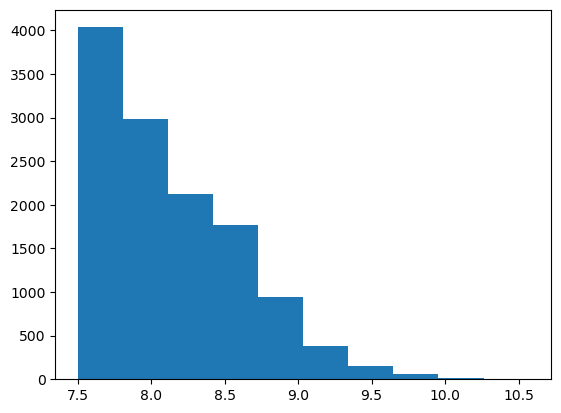

In [20]:
plt.hist(np.log10(masses)) 

In [30]:
morphmodel = model.mPCA(data, norm_function = norm, norm_function_kwargs=norm_function_args)

Creating datamatrix with the following fields:
Particle type:  stars
Fields:  ['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']
norm_function_kwargs:  {'Masses': {'takelog': True, 'plusone': True, 'lower': 0.25, 'upper': 1.0}, 'GFM_Metallicity': {'takelog': True, 'plusone': True, 'lower': 0.1, 'upper': 1.0}, 'GFM_StellarFormationTime': {'takelog': True, 'plusone': True, 'lower': 0.1, 'upper': 1.0}}
Default arguments are used for the fields that are not specified in the norm_function_kwargs
Created datamatrix with shape:  (6469, 12288)


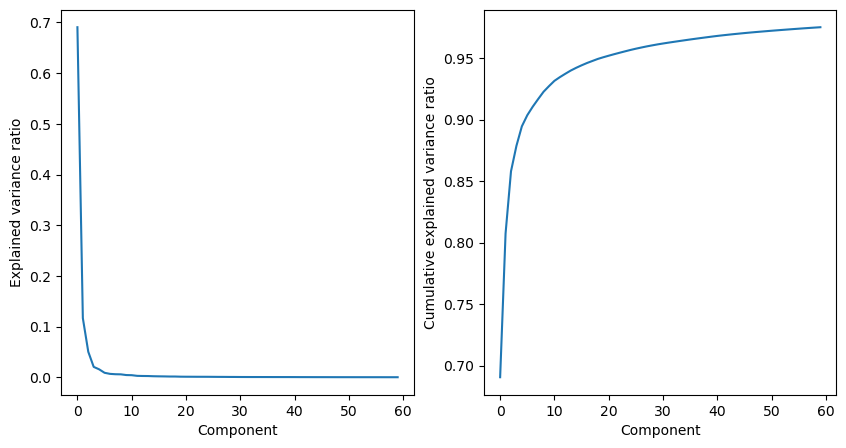

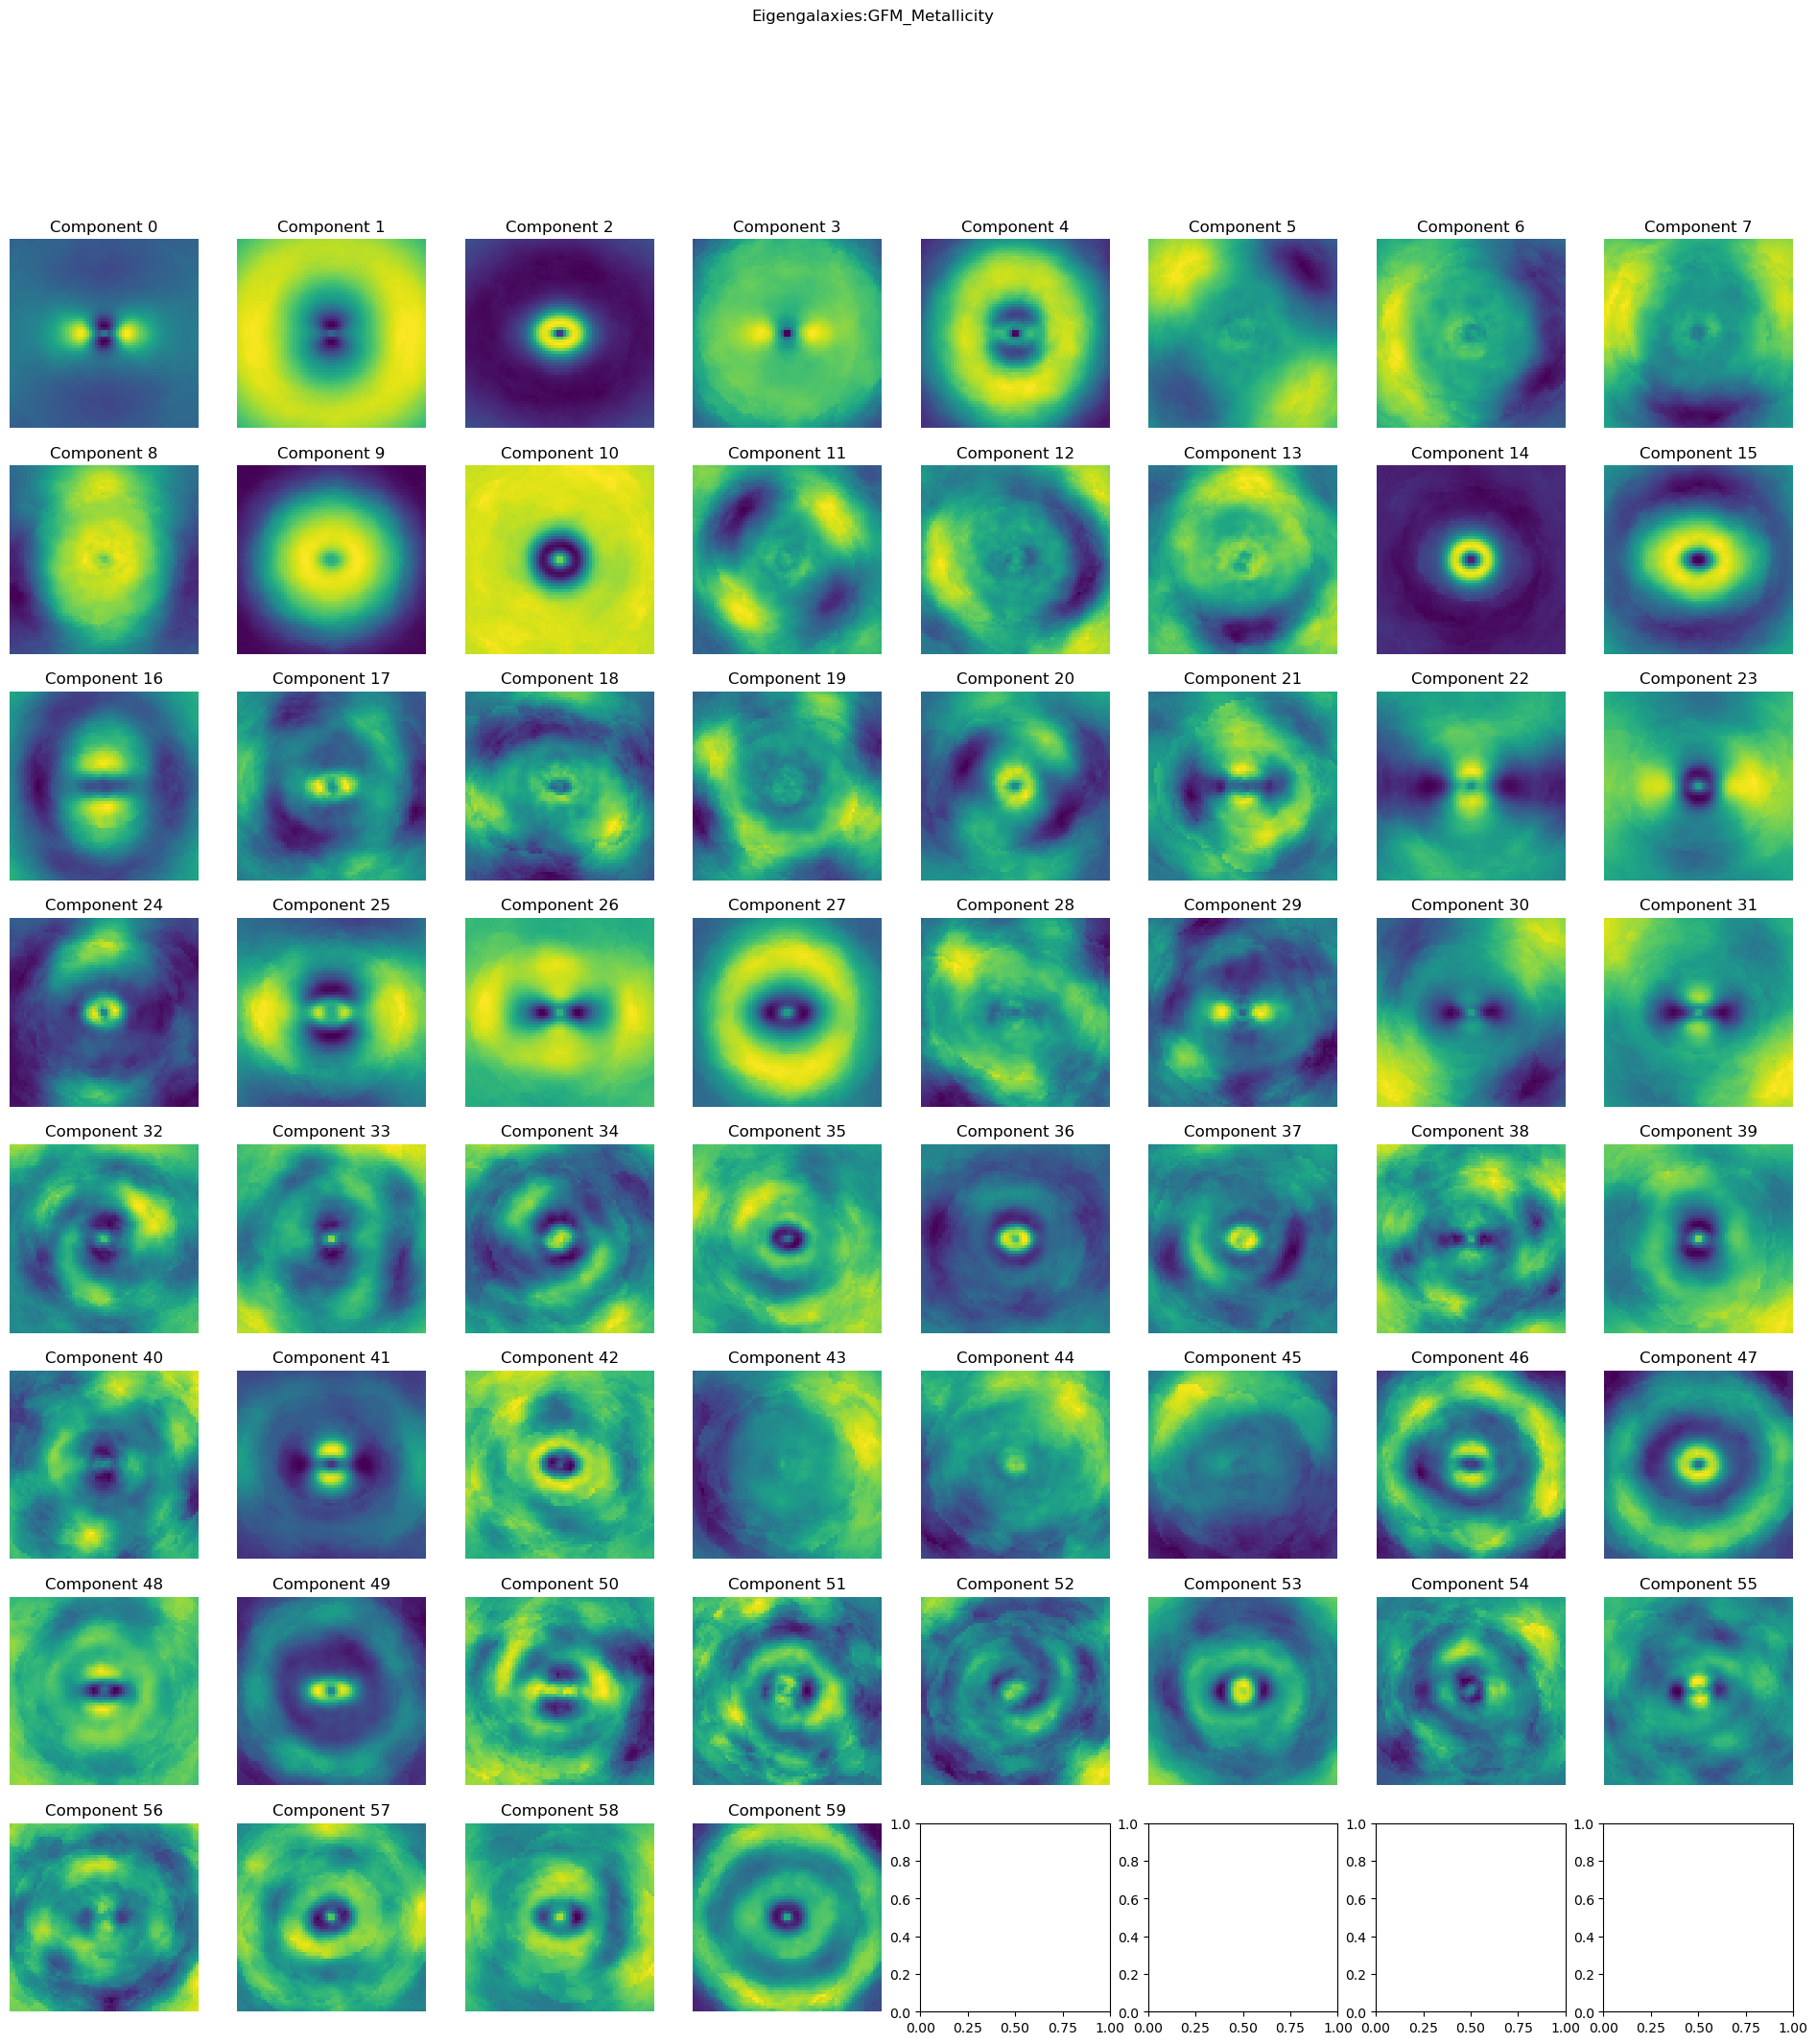

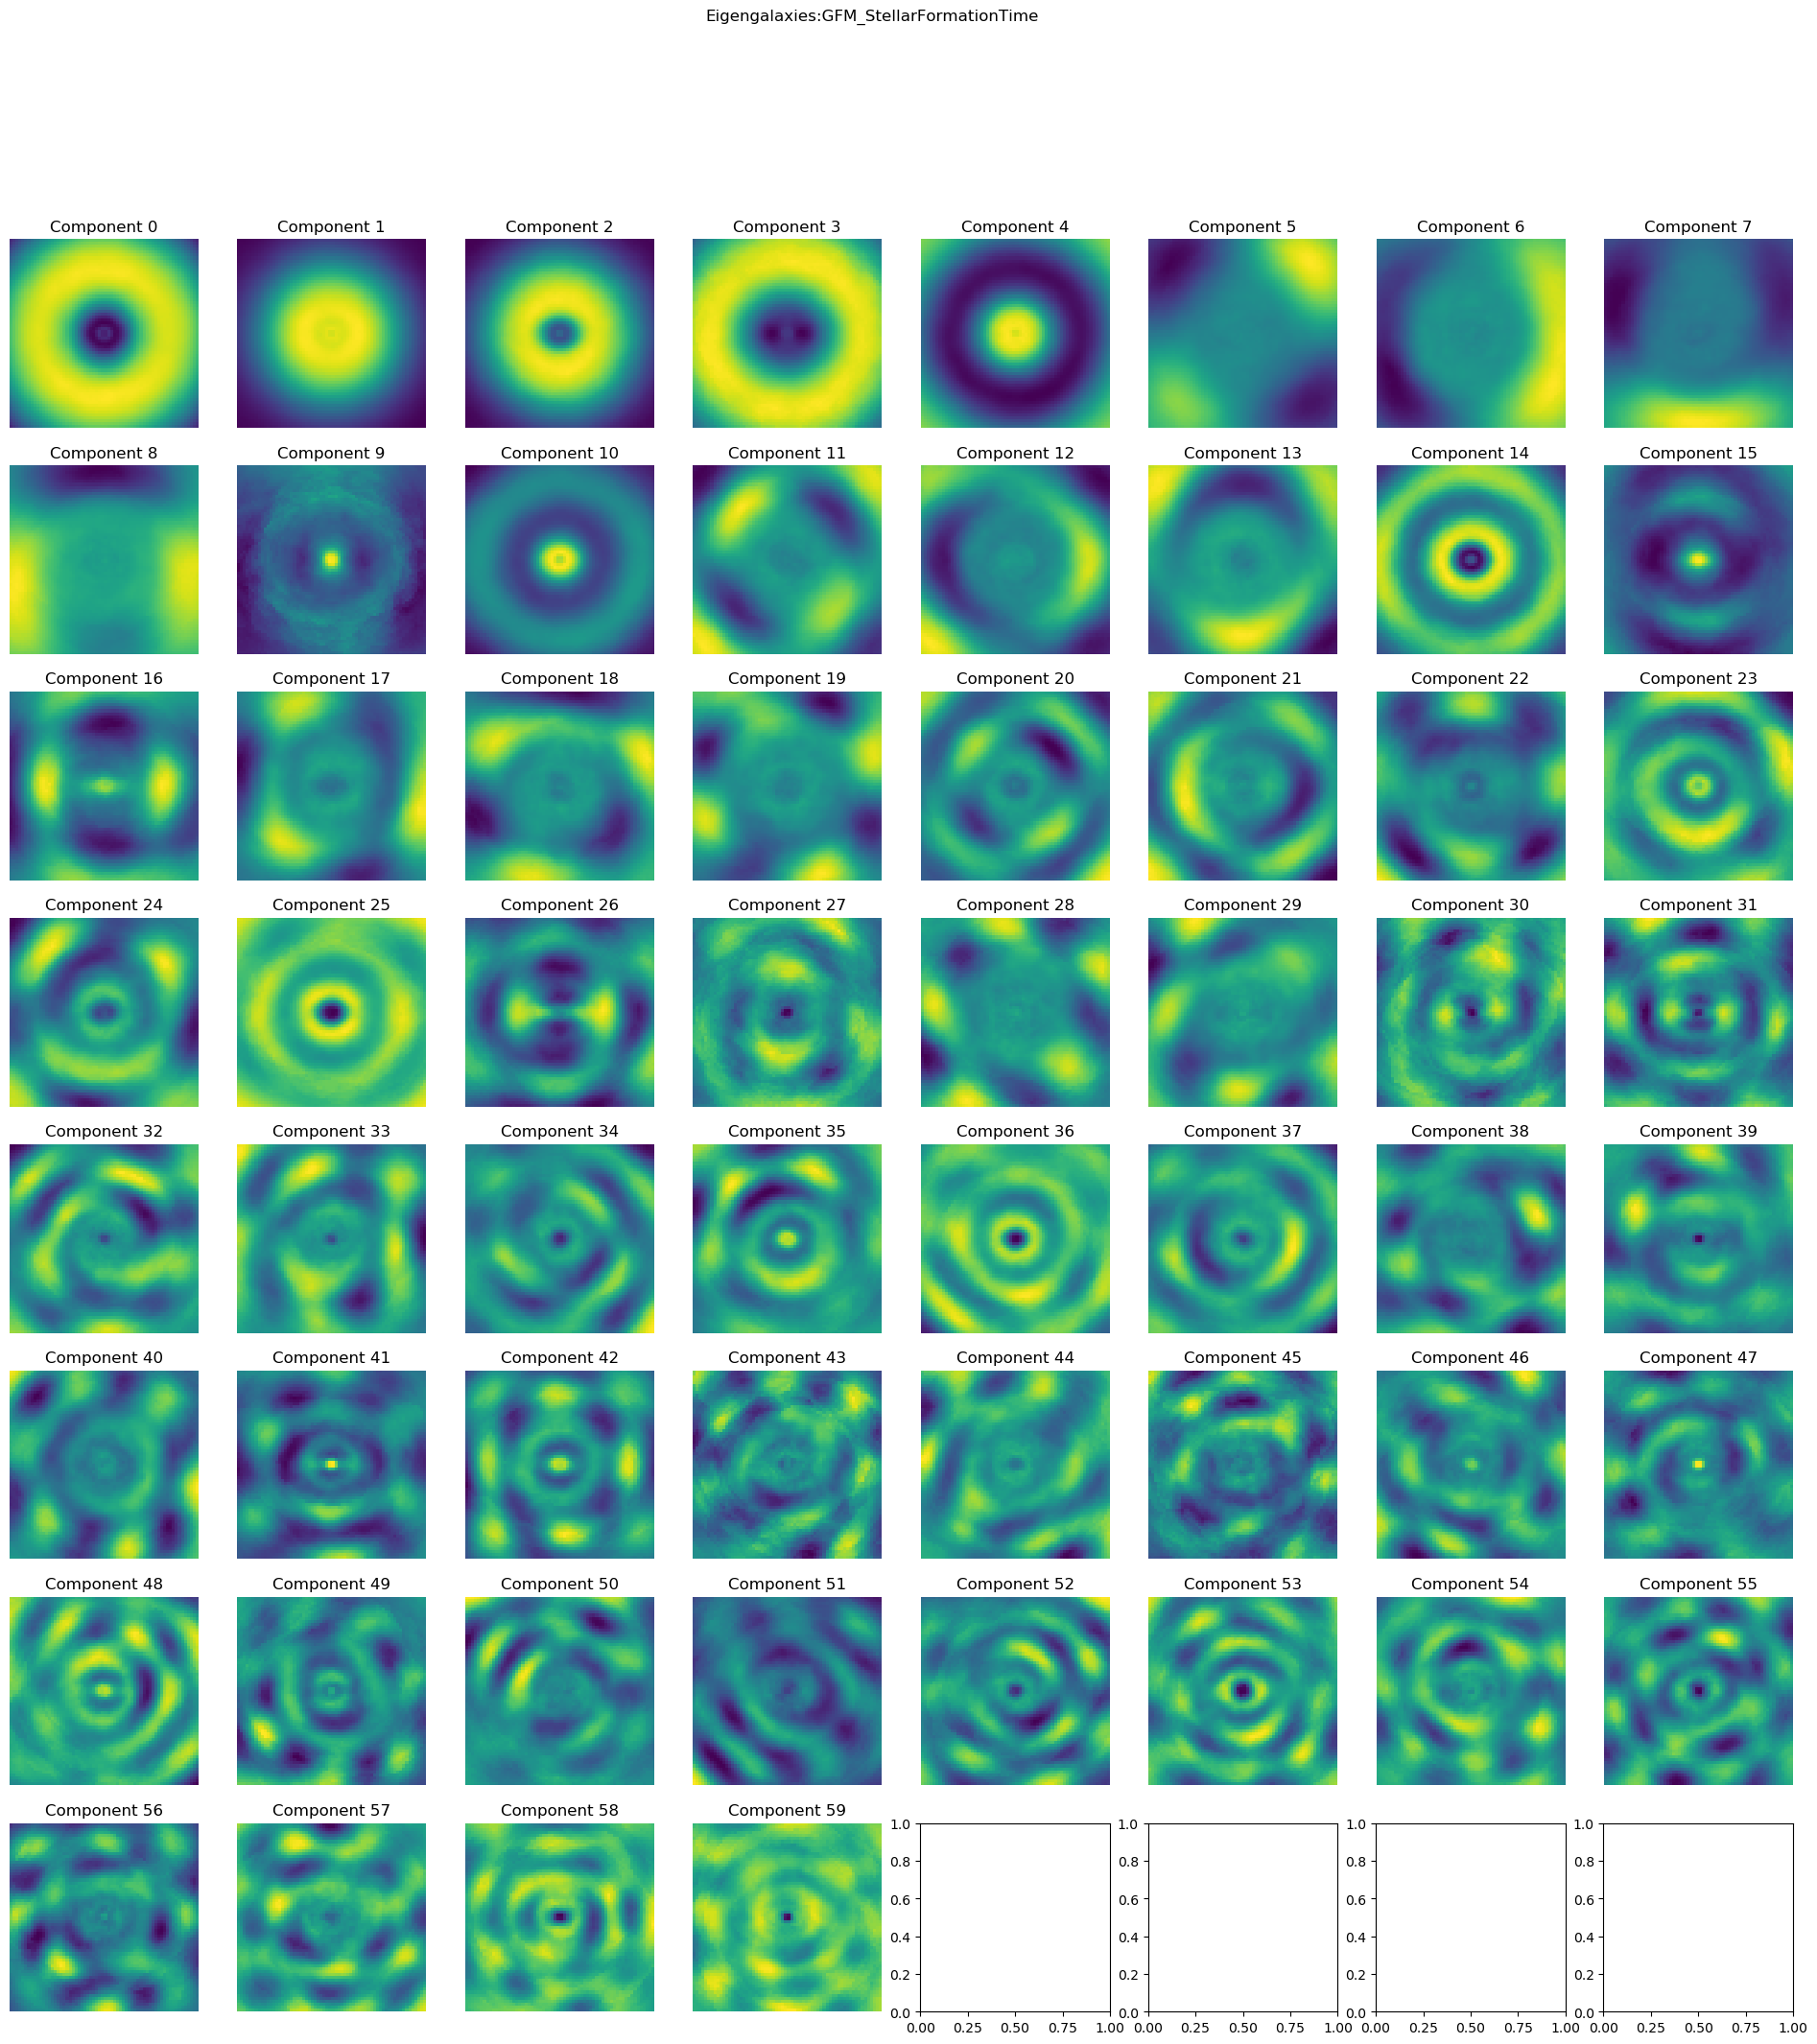

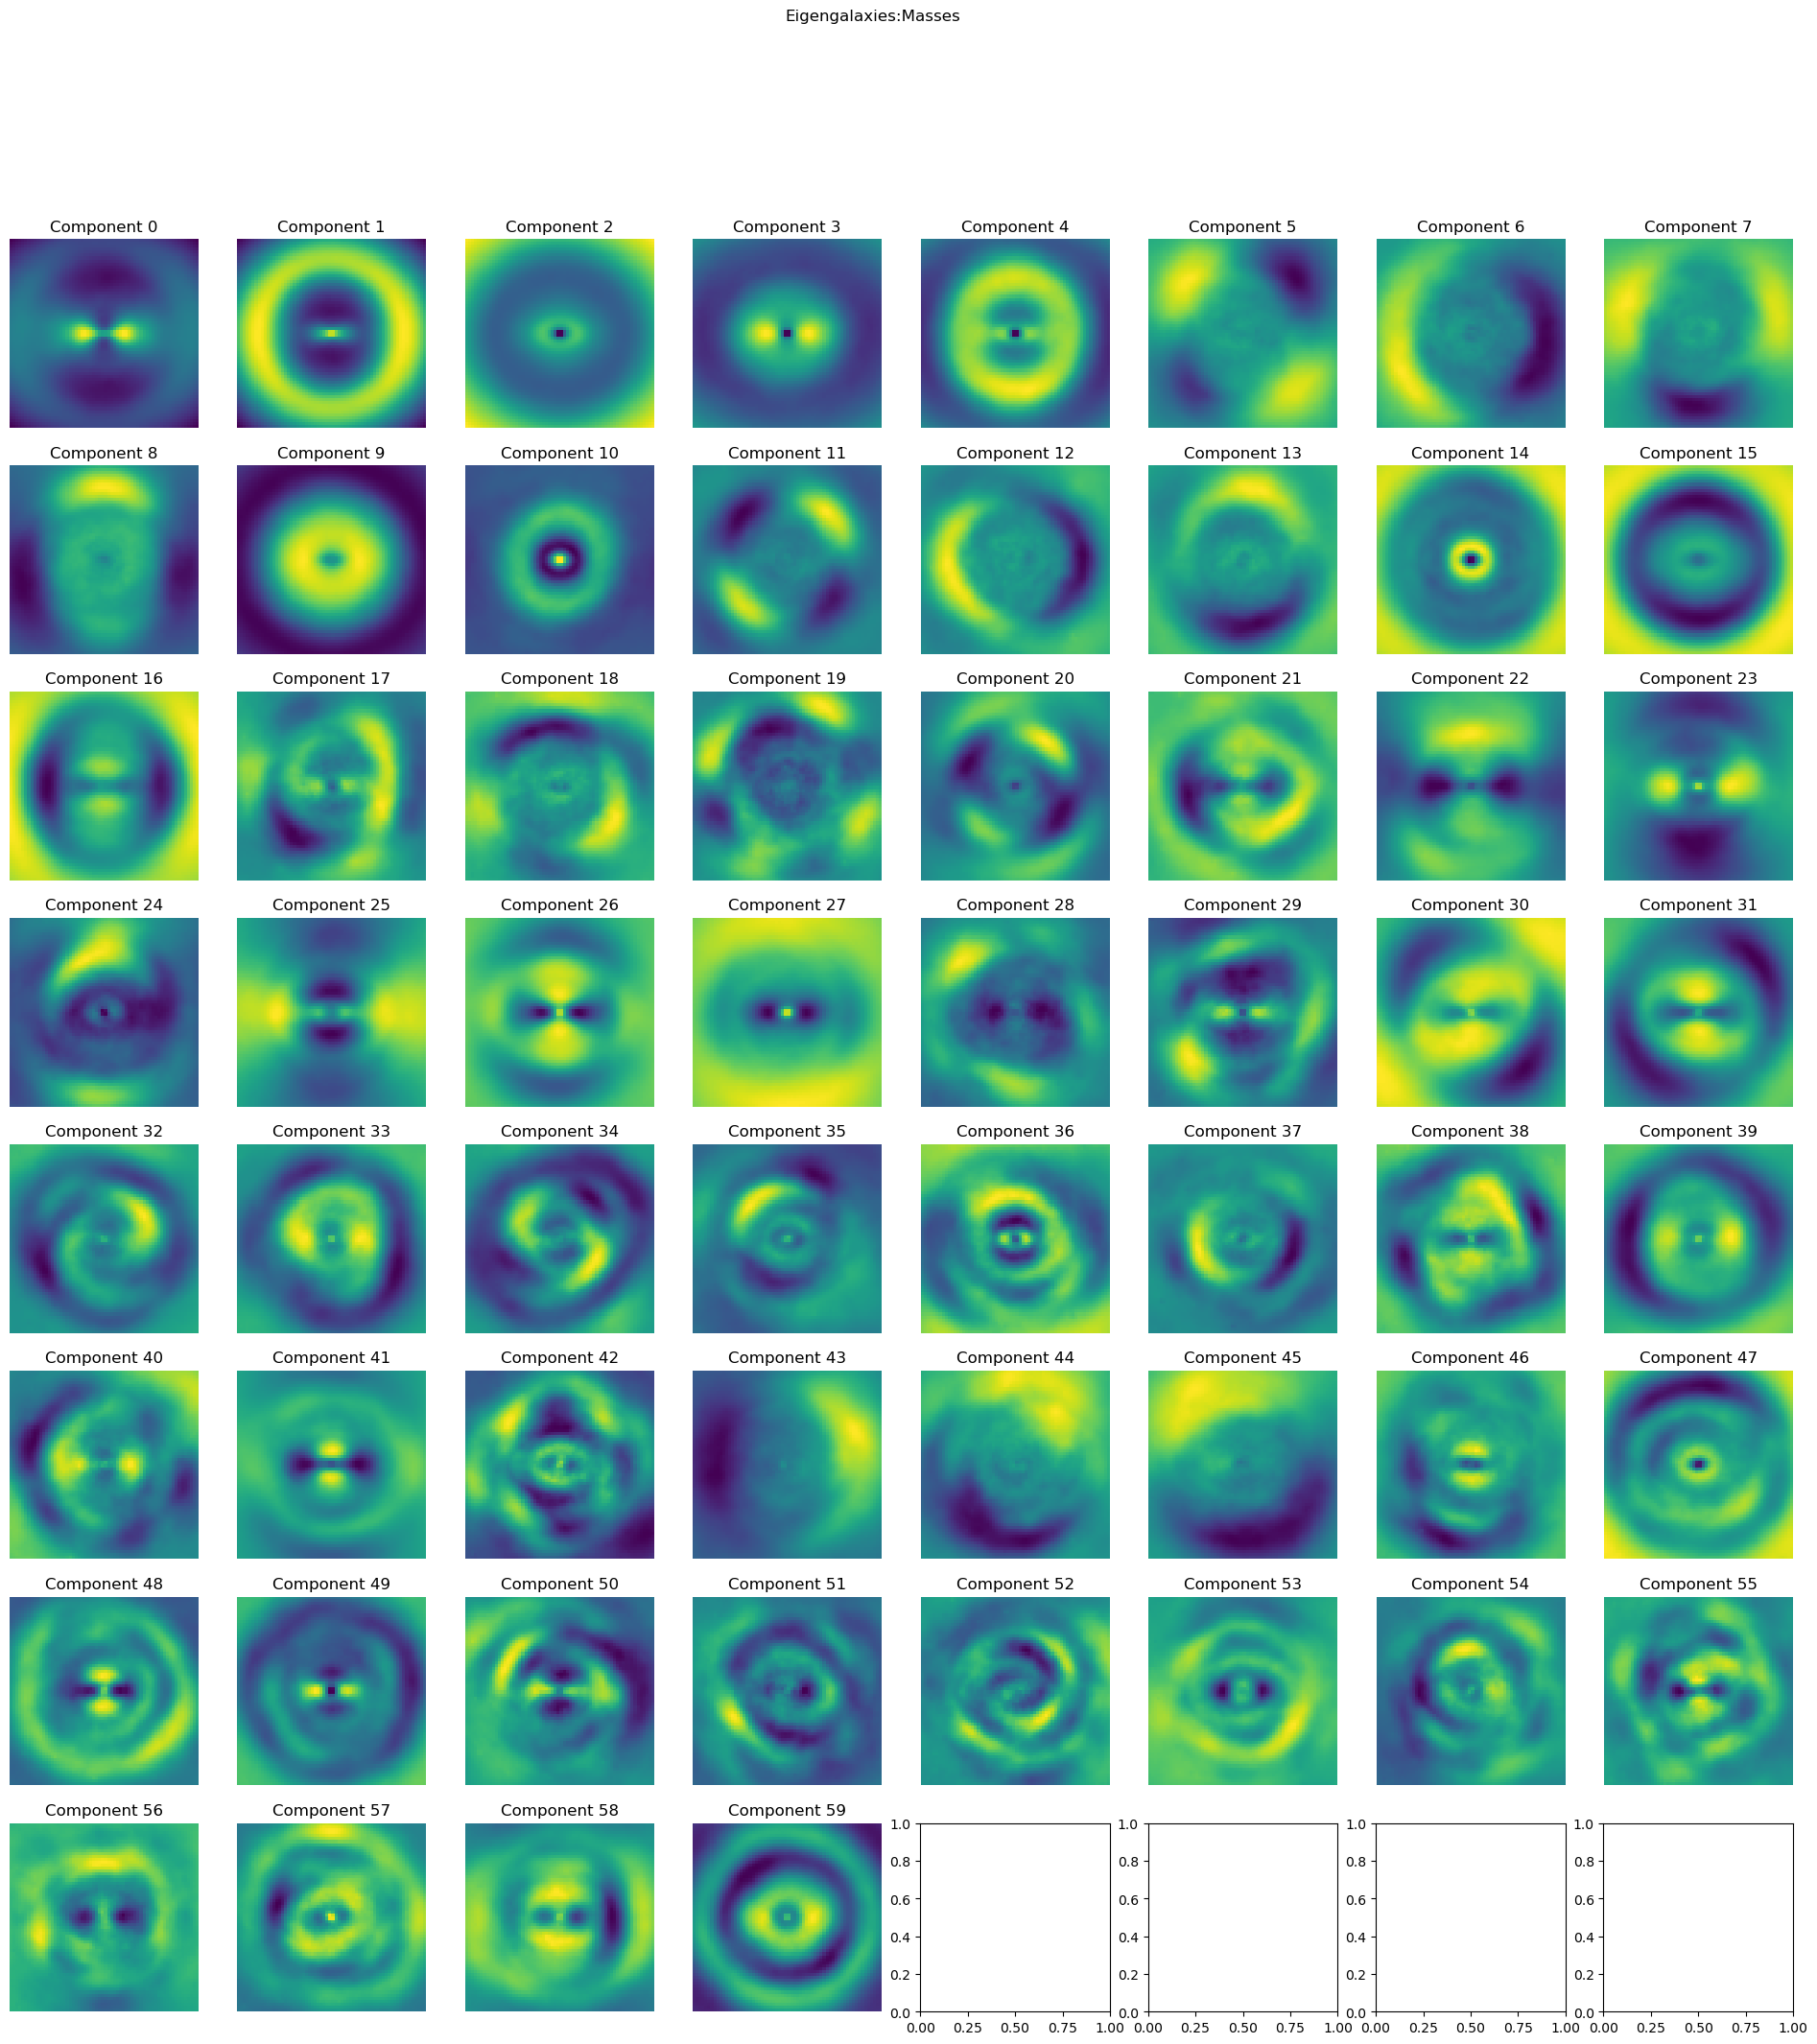

In [71]:
morphmodel.fit(n_components=60)

In [32]:
def show_pca_results(self):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(self.pca.explained_variance_ratio_)
    ax[0].set_xlabel("Component")
    ax[0].set_ylabel("Explained variance ratio")
    ax[1].plot(np.cumsum(self.pca.explained_variance_ratio_))
    ax[1].set_xlabel("Component")
    ax[1].set_ylabel("Cumulative explained variance ratio")
    plt.show()
    
    
    field_length = len(self.data._image_fields[self.particle_type]) 
    
    #Loop over different image fields
    for index,field in enumerate(self.data._image_fields[self.particle_type]):

        

        rows = int(np.ceil(np.sqrt(self.pca.n_components)))
        cols = int(np.ceil(self.pca.n_components/rows))
        fig, ax = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
        for i in range(rows):
            for j in range(cols):
                if i*cols+j < self.pca.n_components:
                    ax[i, j].imshow(self.eigengalaxies[i*cols+j][index])
                    ax[i, j].set_title(f"Component {i*cols+j}")
                    ax[i, j].axis("off")
        fig.suptitle(f"Eigengalaxies:{field}")
        plt.show()
        
        
    
  
    # Plot the mean galaxy
    
    fig, ax = plt.subplots(1,field_length, figsize = (field_length*3, 3))
    for index,field in enumerate(self.data._image_fields[self.particle_type]):
        ax[index].imshow(self.pca.mean_.reshape(field_length, *self._IMG_SHAPE)[index])
        ax[index].set_title(f"{field}")
        ax[index].axis("off")
    fig.suptitle("Mean Galaxy")
    plt.show() 
            
            
    #Calculate residue of random galaxy
    randomind = np.random.randint(0, self.datamatrix.shape[0])
    inverse_images = self.inverse_transformed_datamatrix[randomind].reshape(field_length, *self._IMG_SHAPE)
    for index, field in enumerate(self.data._image_fields[self.particle_type]):
        fig, ax = plt.subplots(1, 3, figsize=(6, 3))
        
        original = self.datamatrix[randomind].reshape(field_length, *self._IMG_SHAPE)[index]
        
        ax[0].imshow(original)
        ax[0].set_title(f"Original galaxy")
        ax[0].axis("off")
        ax[1].imshow(inverse_images[index])
        ax[1].set_title(f"Reconstructed galaxy")
        ax[1].axis("off")
        
        # Calculate residue
        residue = np.abs(original - inverse_images[index])
        ax[2].imshow(residue)
        ax[2].set_title(f"Residue")
        ax[2].axis("off")
        
        fig.suptitle(f"Comparison of {field} field")
        plt.show()

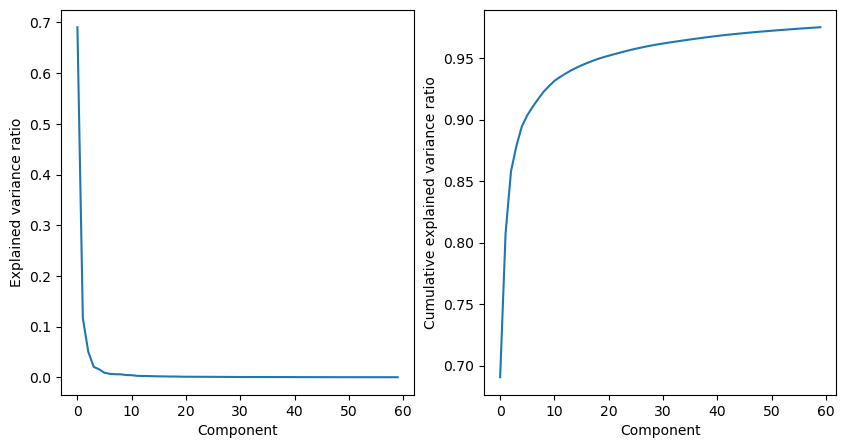

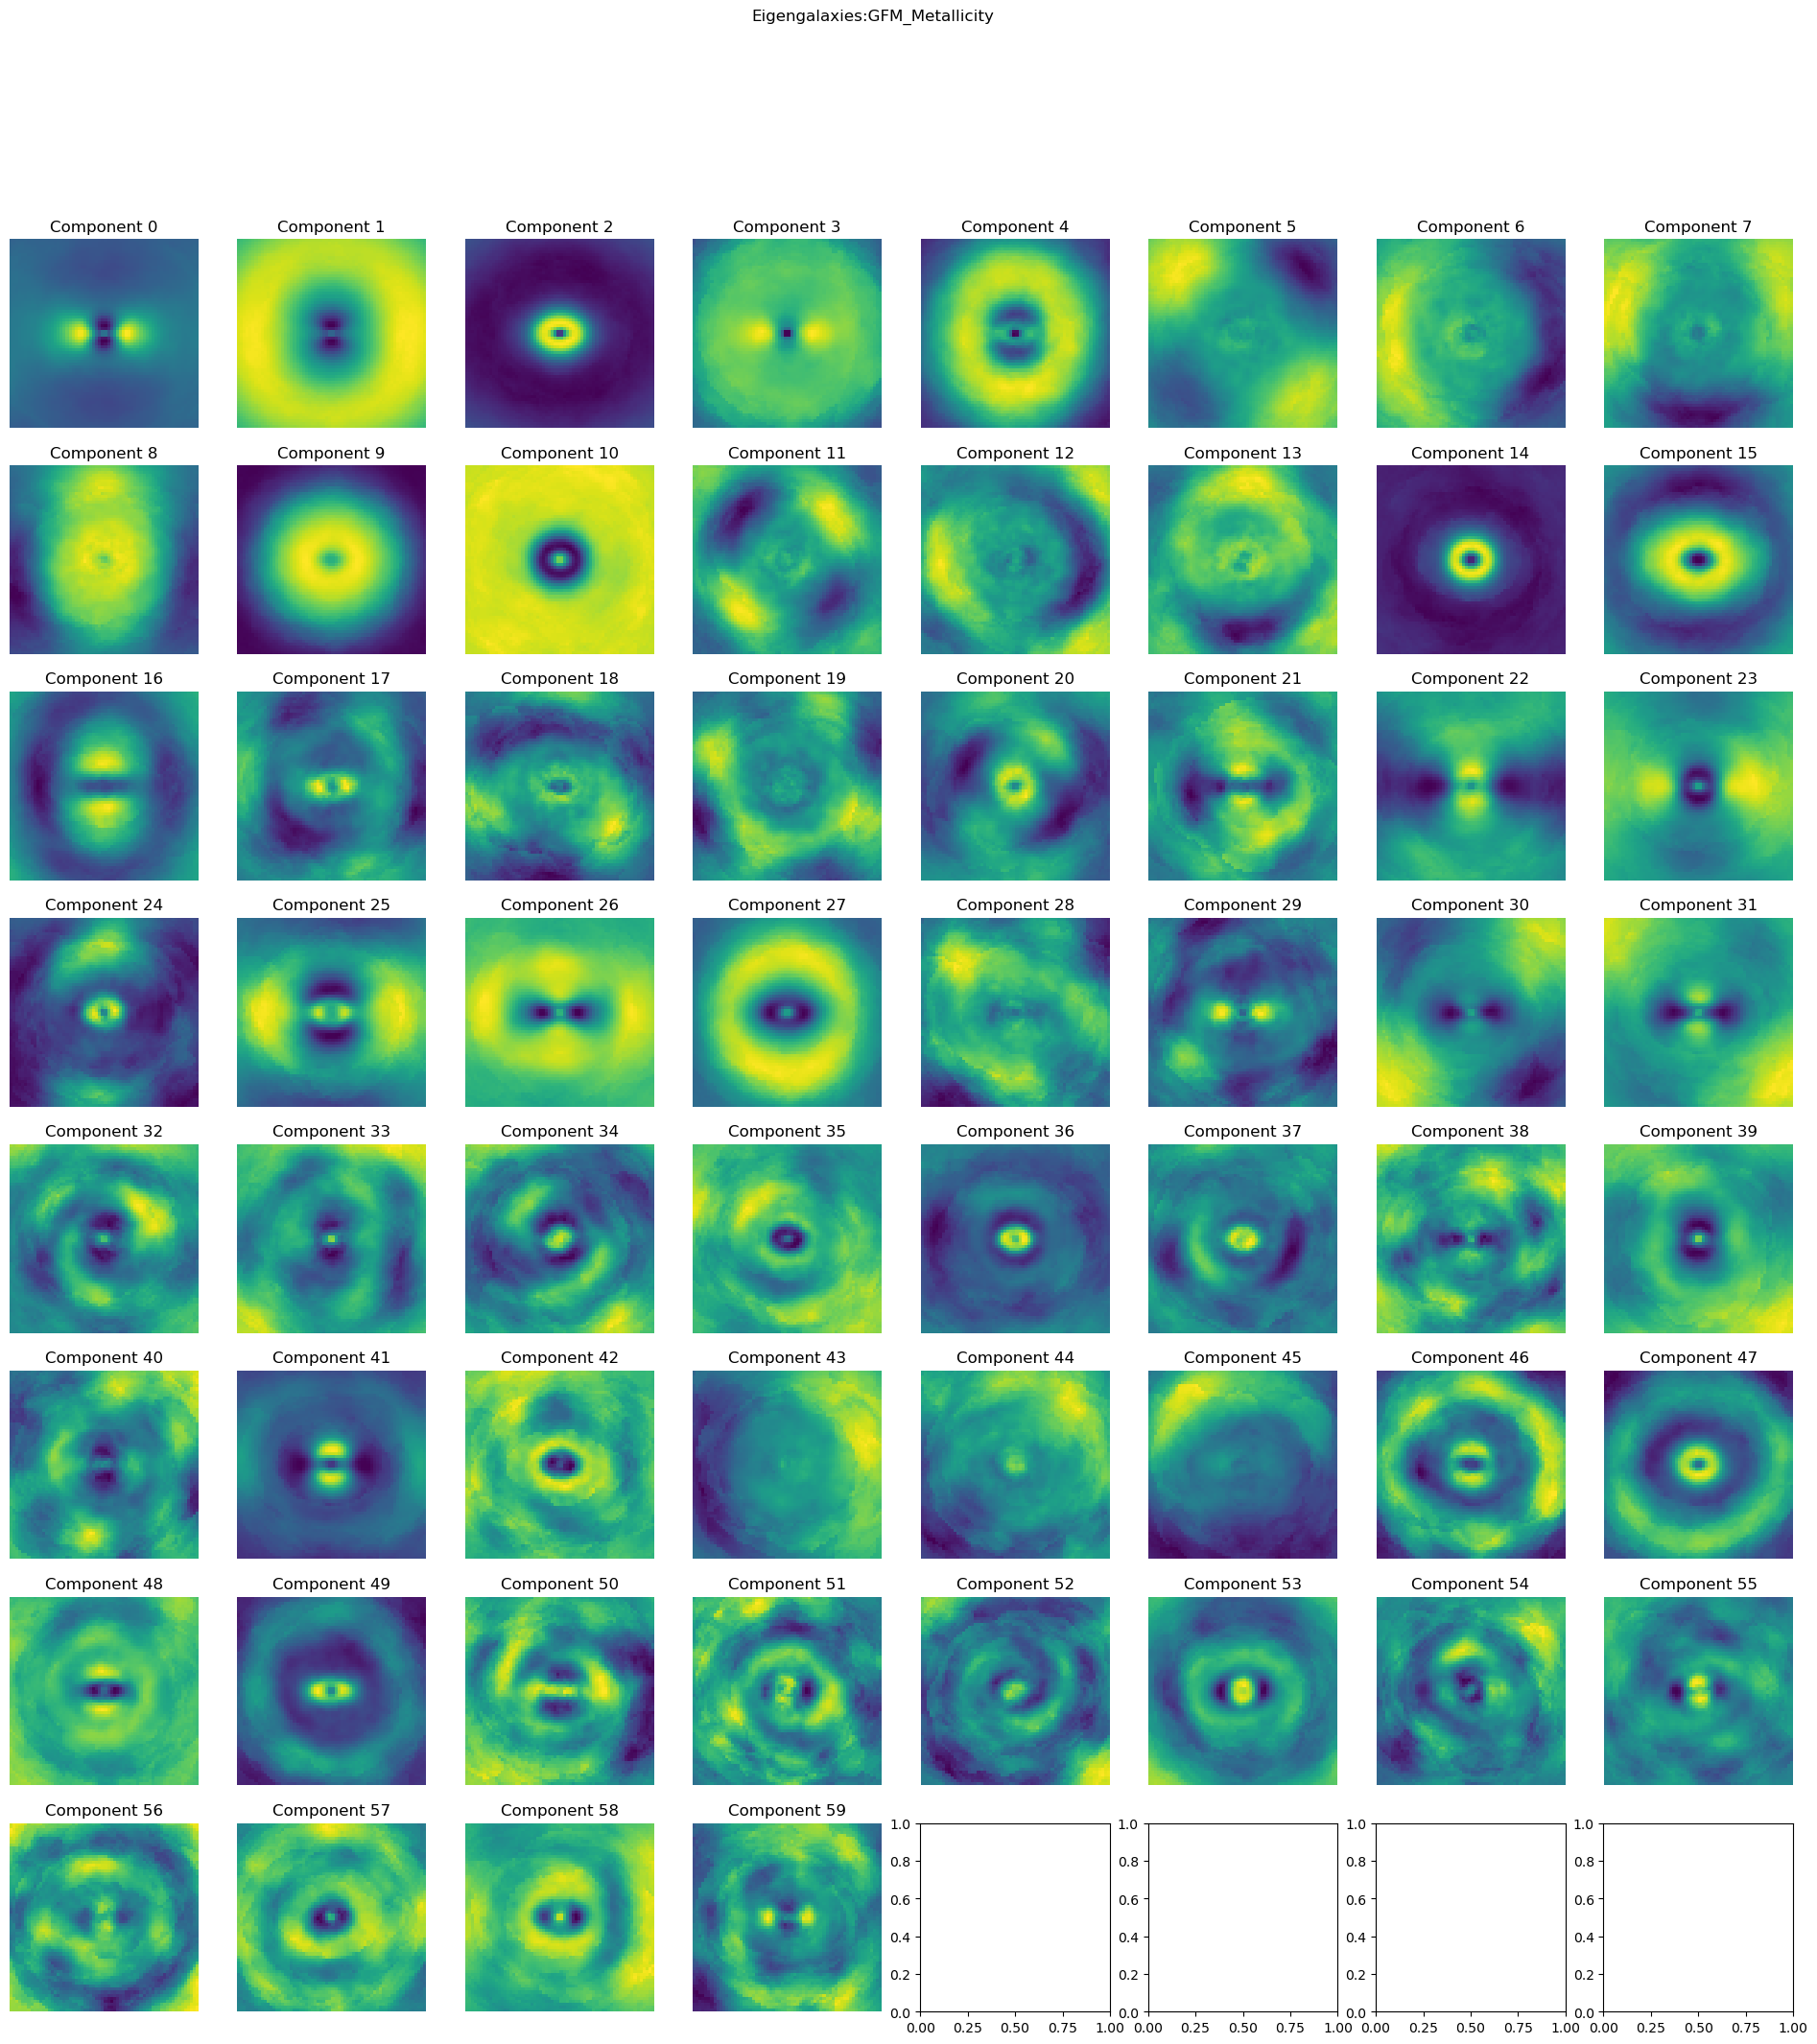

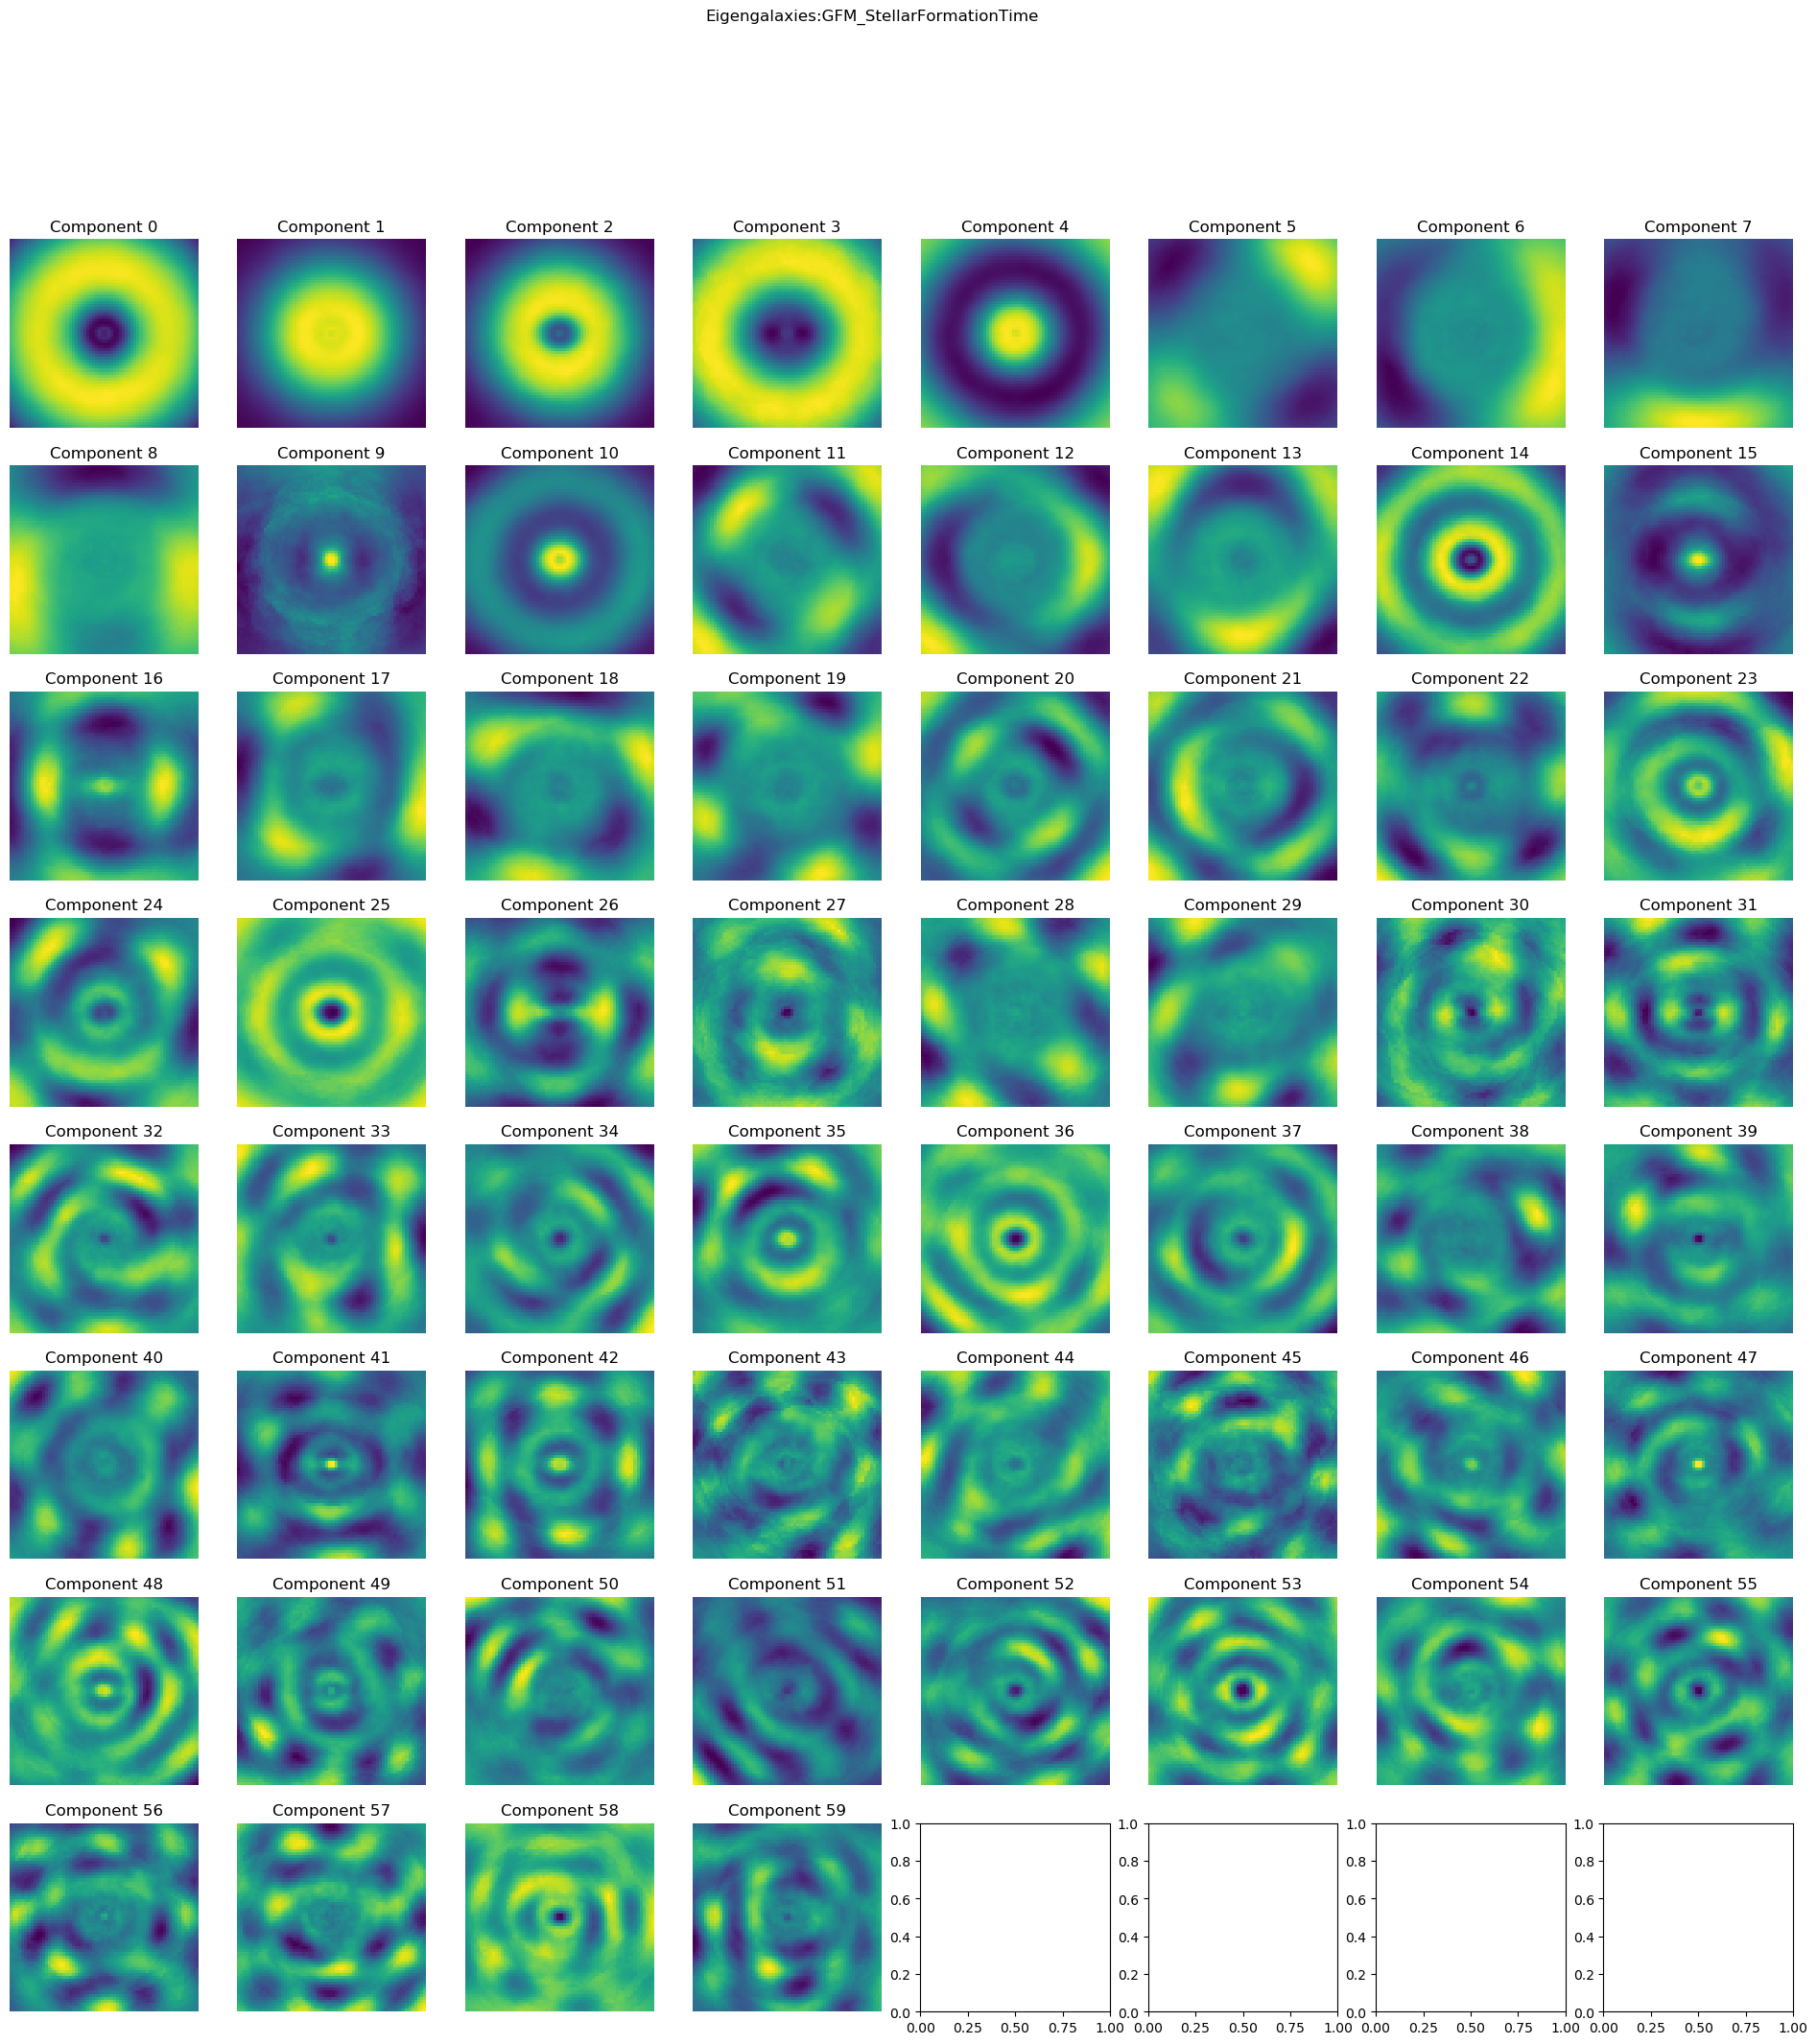

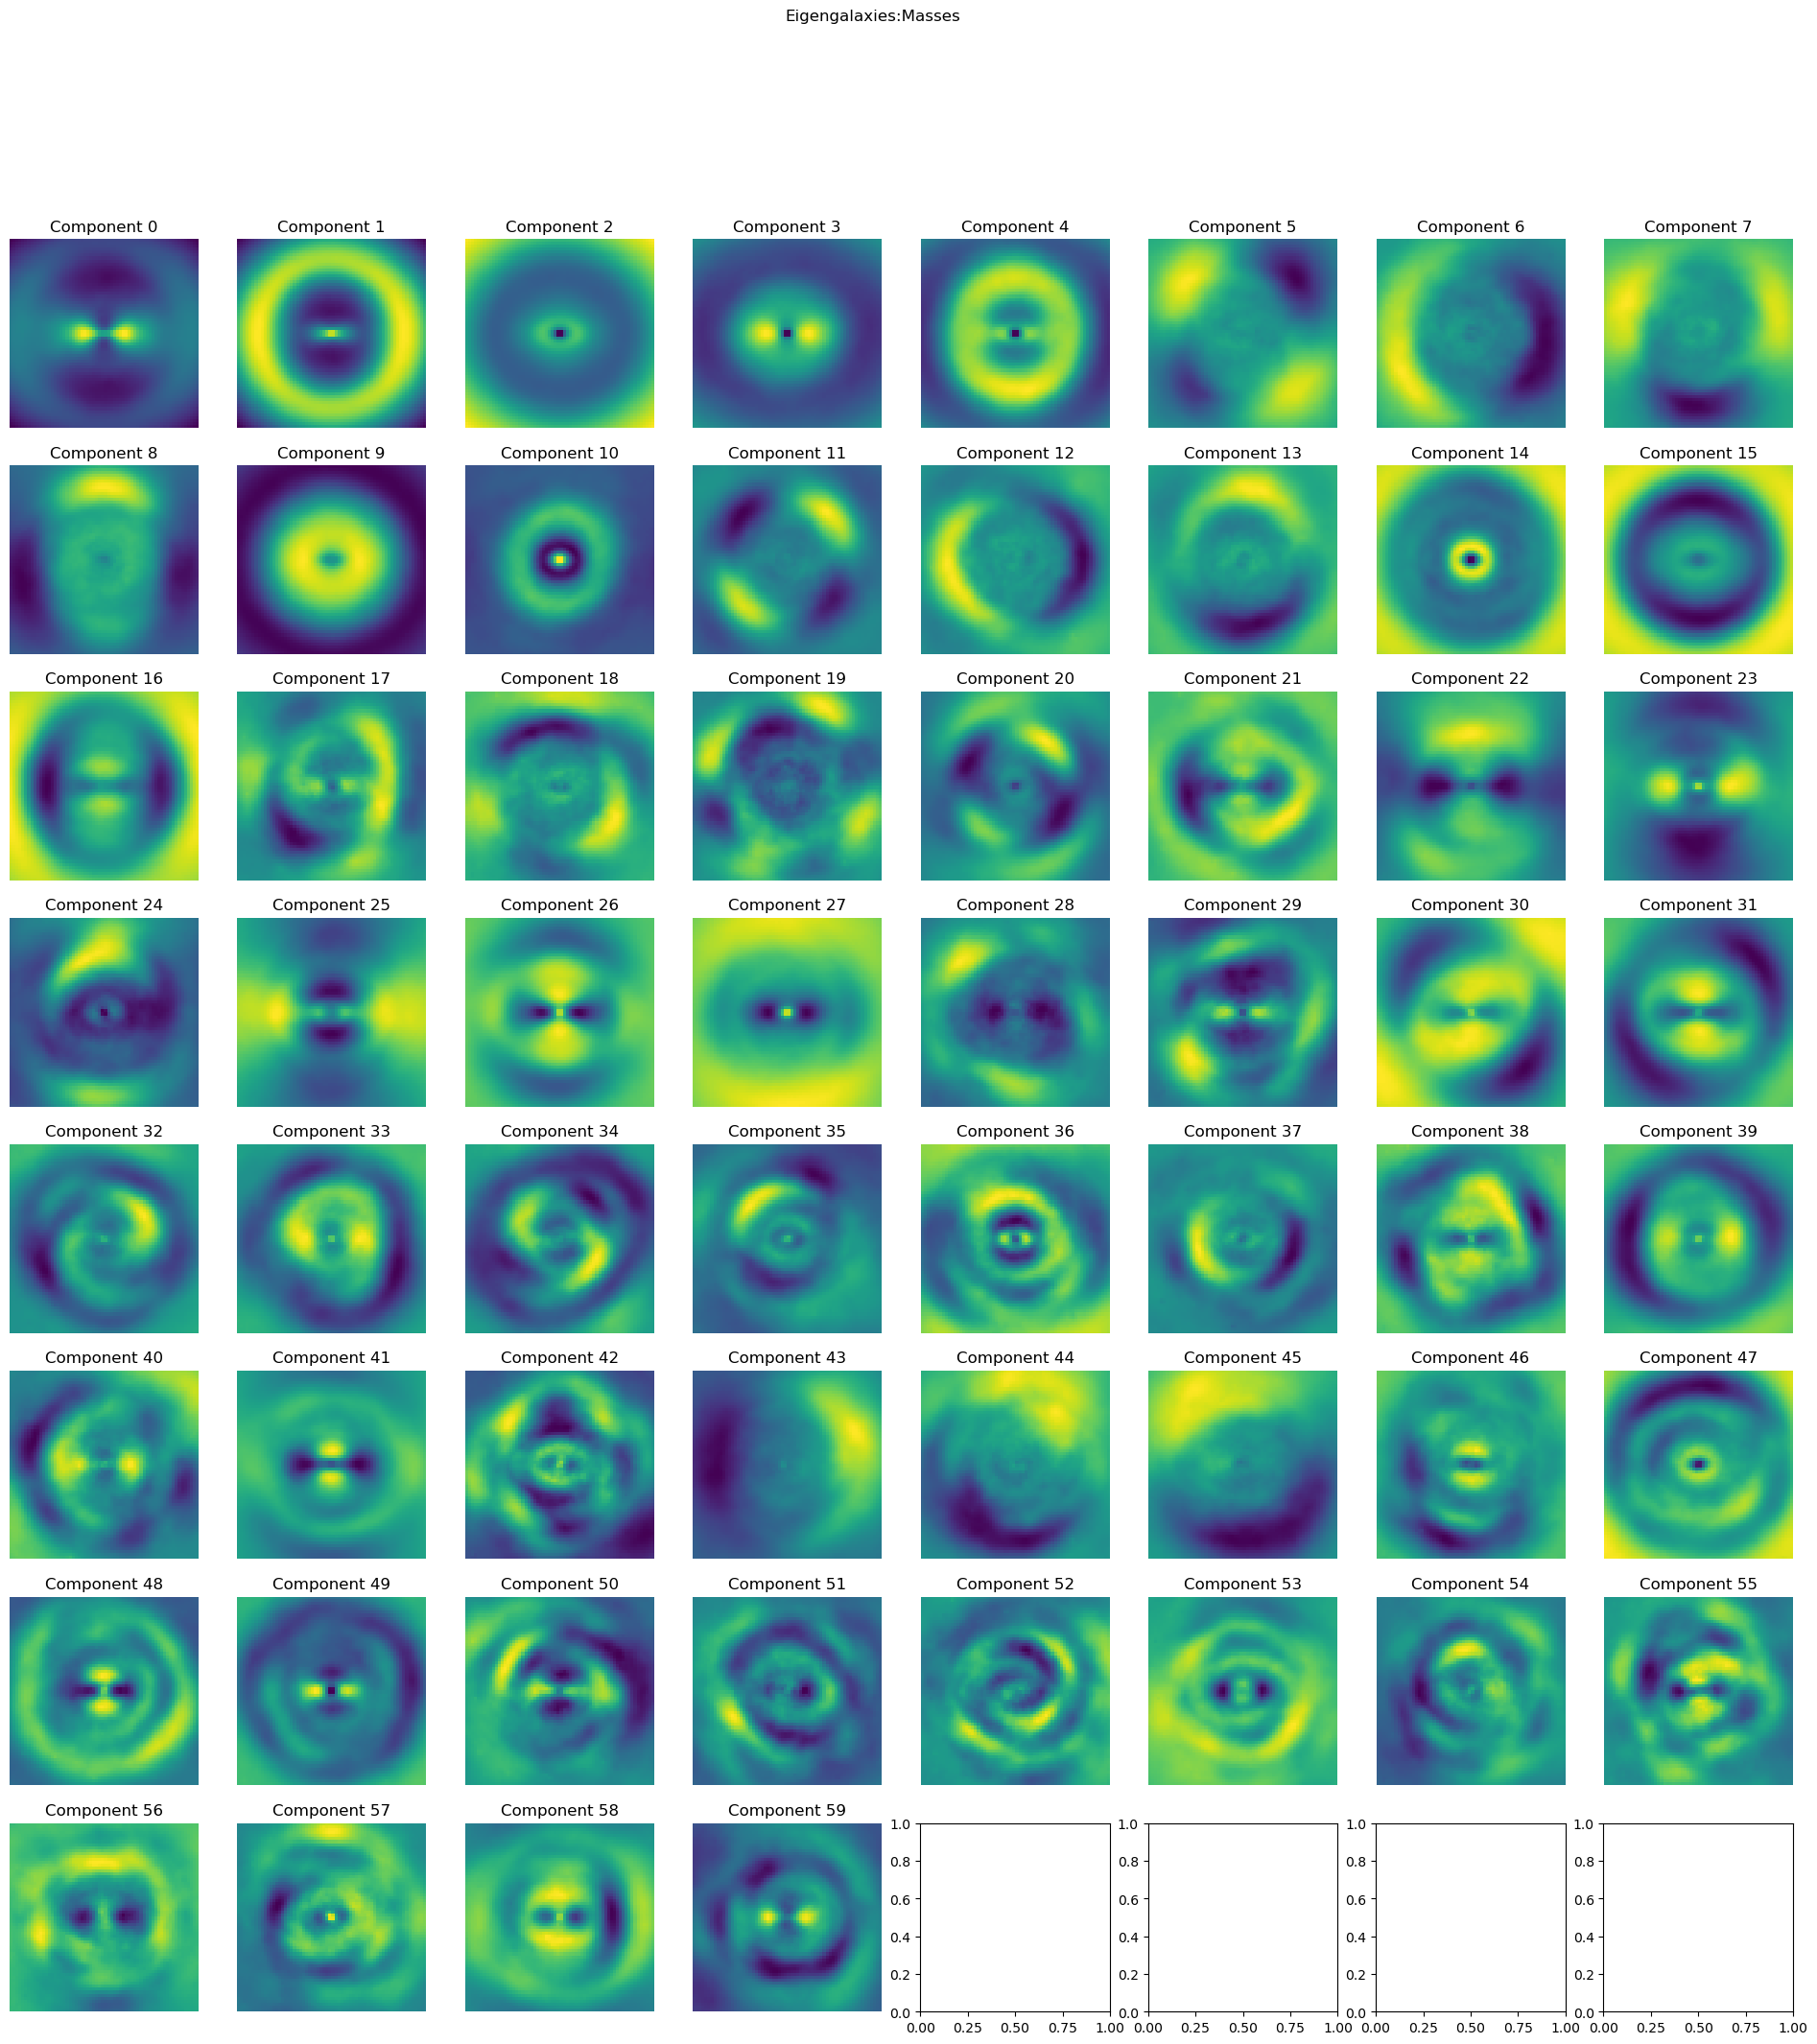

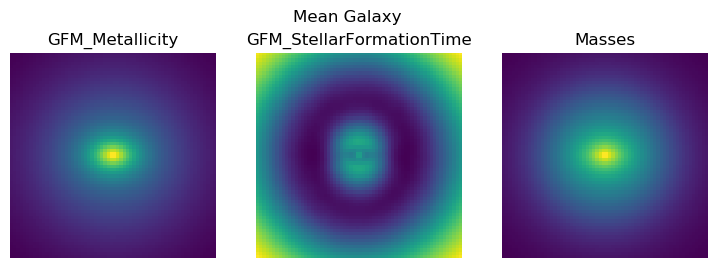

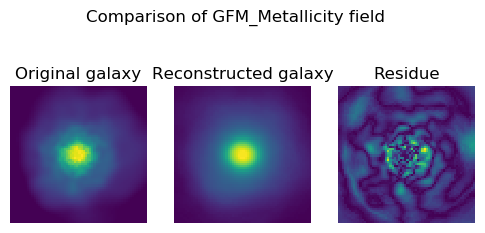

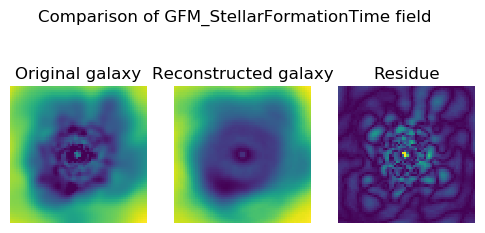

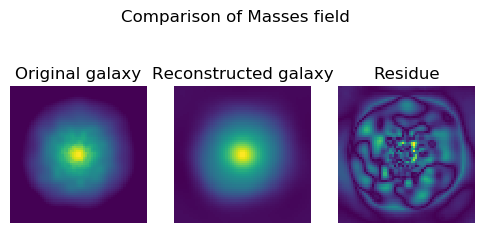

In [69]:
show_pca_results(morphmodel)

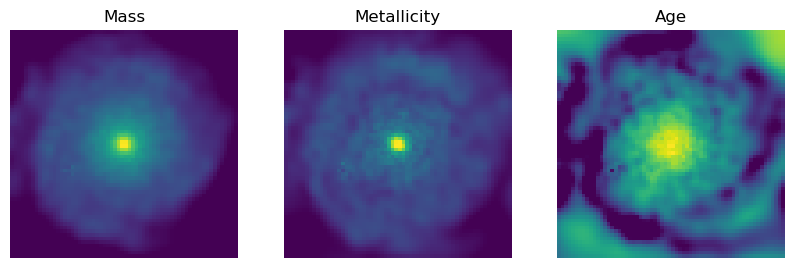

In [40]:
mass = data.get_image(field="Masses", particle_type="stars", index = 20)
metal = data.get_image(field="GFM_Metallicity", particle_type="stars", index = 20)
age = data.get_image(field= "GFM_StellarFormationTime", particle_type="stars", index = 20)


#plot all three images
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(norm(mass,**norm_function_args["Masses"]))
ax[0].set_title("Mass")
ax[0].axis("off")
ax[1].imshow(norm(metal, **norm_function_args["GFM_Metallicity"]))
ax[1].set_title("Metallicity")
ax[1].axis("off")
ax[2].imshow(norm(age, **norm_function_args["GFM_StellarFormationTime"]))
ax[2].set_title("Age")
ax[2].axis("off")
plt.show()


0.5413247155542702 5.873148957068611e-05


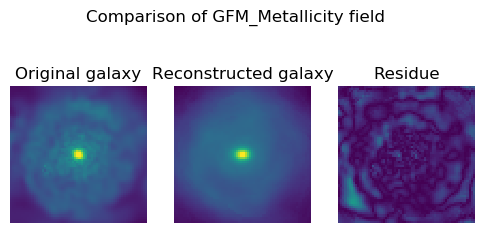

401.21525003208257 2.5500387714251973e-05


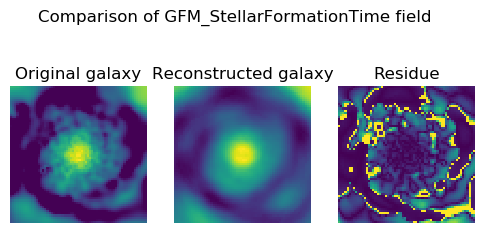

162.27418027171402 3.1740391398370987e-05


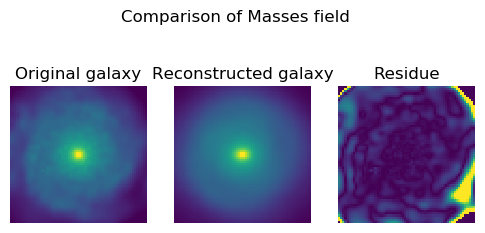

In [70]:
compare(morphmodel,20)

In [41]:
eigen =morphmodel.eigengalaxies

In [42]:
EIGENORDER = morphmodel.data._image_fields["stars"]
EIGENORDER

['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']

In [43]:
mass_eigen = eigen[:,EIGENORDER.index("Masses")]
metal_eigen = eigen[:,EIGENORDER.index("GFM_Metallicity")]
age_eigen = eigen[:,EIGENORDER.index("GFM_StellarFormationTime")]

In [44]:
mean_img = morphmodel.pca.mean_.reshape(3, 64, 64)[EIGENORDER.index("Masses")]
mean_metal_img = morphmodel.pca.mean_.reshape(3, 64, 64)[EIGENORDER.index("GFM_Metallicity")]
mean_age_img = morphmodel.pca.mean_.reshape(3, 64, 64)[EIGENORDER.index("GFM_StellarFormationTime")]

In [46]:
mass_img_normed = norm(mass, **norm_function_args["Masses"])

In [48]:
morphmodel.pca.n_components

60

In [64]:
n_components = morphmodel.pca.n_components

mass_img_centered = mass_img_normed - mean_img
mass_img_centered_reshaped = mass_img_centered.reshape(64*64)
mass_eigen_reshaped = mass_eigen.reshape(n_components,64*64)


weights = np.dot(mass_img_centered_reshaped, mass_eigen_reshaped.T) 

In [62]:
weights.shape

(60,)

In [66]:
age_img = norm(age, **norm_function_args["GFM_StellarFormationTime"]) - mean_age_img

weights = np.dot(age_img.flatten(), age_eigen.reshape(n_components,64*64).T)

In [ ]:
mass_eigen.shape

In [74]:
galaxy = morphmodel.datamatrix[20]

In [75]:
galaxy.shape

(12288,)

In [79]:
all_eigen = eigen.reshape(60,-1)
all_means = morphmodel.pca.mean_

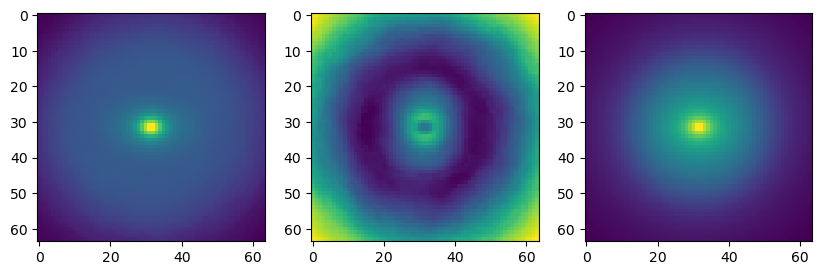

In [89]:
weights = np.dot(galaxy[:64*64] - all_means[:64*64], all_eigen[:,:64*64].T)

inverse = np.dot(weights, all_eigen) + all_means
#images = inverse.reshape(3, 64, 64)

images = inverse.reshape(3,64,64)


fig,ax = plt.subplots(1,3, figsize = (10,5))
ax[0].imshow(images[0])
ax[1].imshow(images[1])
ax[2].imshow(images[2])

In [85]:
all_eigen.shape

(60, 12288)

(-0.5, 63.5, 63.5, -0.5)

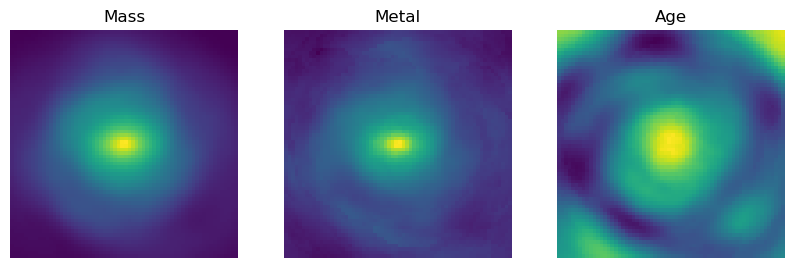

In [67]:
reconstruction_mass_img = np.dot(weights, mass_eigen.reshape(n_components,64*64)) + mean_img.flatten()
reconstruction_metal_img = np.dot(weights, metal_eigen.reshape(n_components,64*64)) + mean_metal_img.flatten()
reconstruction_age_img = np.dot(weights, age_eigen.reshape(n_components,64*64)) + mean_age_img.flatten()


# show the reconstructed images

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(reconstruction_mass_img.reshape(64,64))
ax[0].set_title("Mass")
ax[0].axis("off")

ax[1].imshow(reconstruction_metal_img.reshape(64,64))
ax[1].set_title("Metal")
ax[1].axis("off")


ax[2].imshow(reconstruction_age_img.reshape(64,64))
ax[2].set_title("Age")
ax[2].axis("off")



In [ ]:
reconstruction_mass_img = np.dot(weights, mass_eigen.reshape(n_components,64*64)) + mean_img.flatten()
reconstruction_metal_img = np.dot(weights, metal_eigen.reshape(n_components,64*64)) + mean_metal_img.flatten()
reconstruction_age_img = np.dot(weights, age_eigen.reshape(n_components,64*64)) + mean_age_img.flatten()


# show the reconstructed images

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(reconstruction_mass_img.reshape(64,64))
ax[0].set_title("Mass")
ax[0].axis("off")

ax[1].imshow(reconstruction_metal_img.reshape(64,64))
ax[1].set_title("Metal")
ax[1].axis("off")


ax[2].imshow(reconstruction_age_img.reshape(64,64))
ax[2].set_title("Age")
ax[2].axis("off")



In [55]:
def compare(self, index = None):
    field_length = len(self.data._image_fields[self.particle_type])
     #Calculate residue of random galaxy
    if index is None:
        randomind = np.random.randint(0, self.datamatrix.shape[0])
    else:
        randomind = index
    inverse_images = self.inverse_transformed_datamatrix[randomind].reshape(field_length, *self._IMG_SHAPE)
    for index, field in enumerate(self.data._image_fields[self.particle_type]):
        fig, ax = plt.subplots(1, 3, figsize=(6, 3))
        
        original = self.datamatrix[randomind].reshape(field_length, *self._IMG_SHAPE)[index]
        
        ax[0].imshow(original)
        ax[0].set_title(f"Original galaxy")
        ax[0].axis("off")
        ax[1].imshow(inverse_images[index])
        ax[1].set_title(f"Reconstructed galaxy")
        ax[1].axis("off")
        
        # Calculate residue
        residue = np.abs(original - inverse_images[index])
        #Divide with original where original != 0
        residue[original != 0] = residue[original != 0] / original[original != 0]
        print(residue.max(), residue.min())
        ax[2].imshow(residue, vmin=0, vmax=1)
        ax[2].set_title(f"Residue")
        ax[2].axis("off")
        
        fig.suptitle(f"Comparison of {field} field")
        plt.show()

0.5699688446166187 2.56306932512909e-05


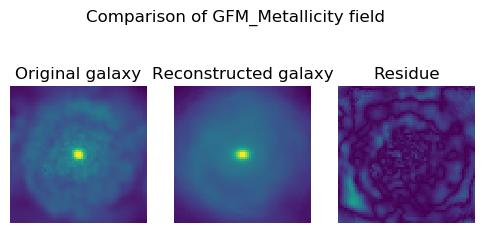

403.1407439303177 3.044359768833438e-05


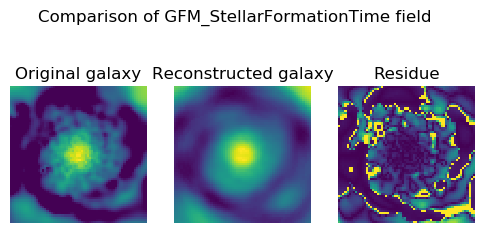

148.36195261459486 8.176334846380205e-06


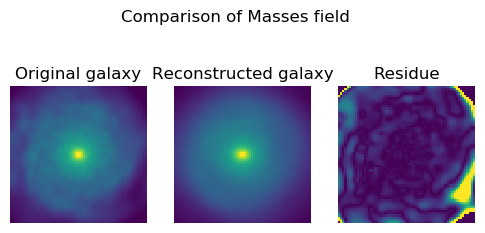

In [57]:
compare(morphmodel,20)

In [55]:
masses = data.get_attribute("mass")
ids = data.get_attribute("halo_id")

In [28]:
likelihood = morphmodel.pca.score_samples(morphmodel.datamatrix)

In [29]:
outlier = np.argsort(likelihood)

In [57]:
ids[outlier[151]]

289951.0

(array([230., 169., 183., 181., 139.,  49.,  28.,  13.,   7.,   1.]),
 array([ 7.5005016,  7.7863483,  8.072195 ,  8.358042 ,  8.643888 ,
         8.929735 ,  9.215583 ,  9.50143  ,  9.787276 , 10.073123 ,
        10.35897  ], dtype=float32),
 <a list of 10 Patch objects>)

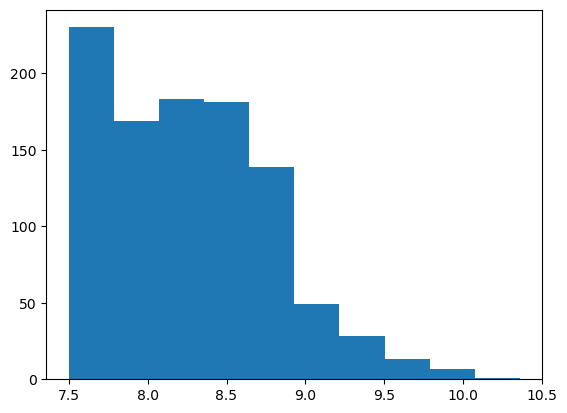

In [63]:
plt.hist(np.log10(masses[outlier[:1000]]))

49.23188041874031 4.730018779544598e-05


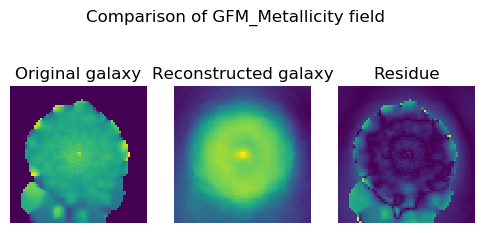

550.5948583164237 1.080429327776633e-05


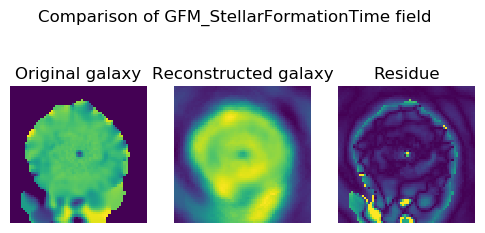

252.70762135646038 1.7541736648231387e-05


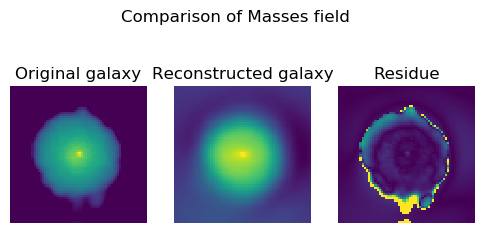

In [65]:
compare(morphmodel, outlier[12])

In [27]:
np.log10(masses).min()

7.5000753